# Implement abagging using Random Forest algorithm

# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset

In [2]:
data = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

print(data.shape)

(2500, 13)


In [3]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


# Selecting rows and colums from the dataset

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print("Shape of X is %s and shape of y is %s"%(X.shape,y.shape))

Shape of X is (2500, 12) and shape of y is (2500,)


# Splitting dataset into training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Using randomforest model

In [9]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [10]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Prediction

In [11]:
y_pred = rf_classifier.predict(X_test)


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

accuracy_percent=round(accuracy,2)
print("Accuracy is:",accuracy_percent*100,"%")

print(classification_report(y_test, y_pred))


Accuracy: 0.87
Accuracy is: 87.0 %
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.86      0.87       316
Ürgüp Sivrisi       0.86      0.87      0.87       309

     accuracy                           0.87       625
    macro avg       0.87      0.87      0.87       625
 weighted avg       0.87      0.87      0.87       625



# Plotting Graphs

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)


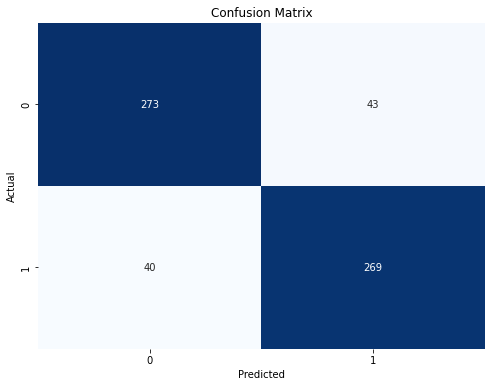

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Extracts the feature importance scores from the rf_classifier object and stores them in the variable feature_importances.
 
The .feature_importances_ attribute of a random forest classifier object contains an array of importance scores for each feature.

In [16]:
feature_importances = rf_classifier.feature_importances_


creates a DataFrame called feature_importance_df 
with two columns: 'Feature' and 'Importance'

In [17]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


 features with the highest importance scores at top of the DataFrame.

In [18]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


C:\Users\Owner\AppData\Local\Temp\ipykernel_5276\1463805296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')


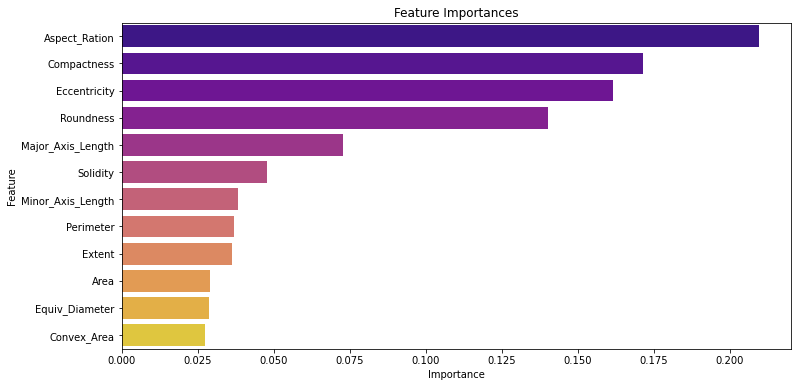

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')
plt.title('Feature Importances')
plt.show()